In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import mediapy as media
import numpy as np
from diffusers import DDIMScheduler

try:
    from local_sd_pipeline import LocalStableDiffusionPipeline
    from optim_utils import *
except ModuleNotFoundError:
    import os; os.chdir("..")
    from local_sd_pipeline import LocalStableDiffusionPipeline
    from optim_utils import *

%load_ext autoreload
%autoreload 2

In [2]:
# load model
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model_id = "CompVis/stable-diffusion-v1-4"

pipe = LocalStableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    safety_checker=None,
    requires_safety_checker=False,
)
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to(device)

In [3]:
num_inference_steps = 50
guidance_scale = 7.5
num_images_per_prompt = 4
image_size = 512

## Memorized Prompt

In [4]:
prompt = "Wall view 002"
print(prompt)

Wall view 002


In [5]:
outputs, track_stats = pipe(
    prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    num_images_per_prompt=num_images_per_prompt,
    track_noise_norm=True,
)
text_noise_norm = track_stats["text_noise_norm"]
outputs = outputs.images

  0%|          | 0/50 [00:00<?, ?it/s]

prompt: Wall view 002


,,,

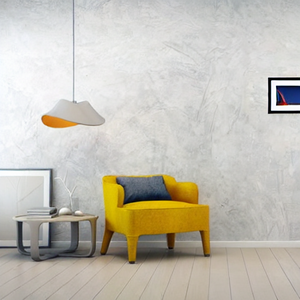
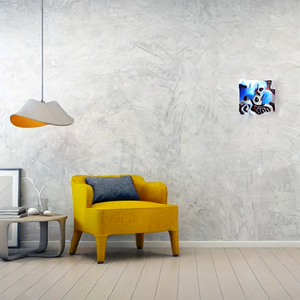
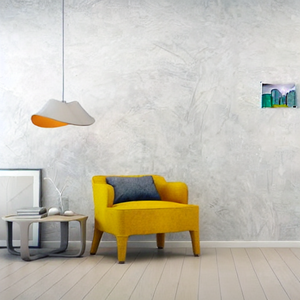
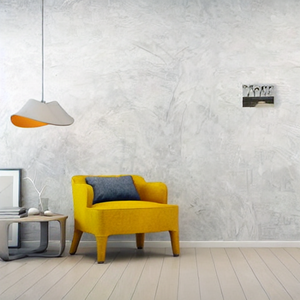

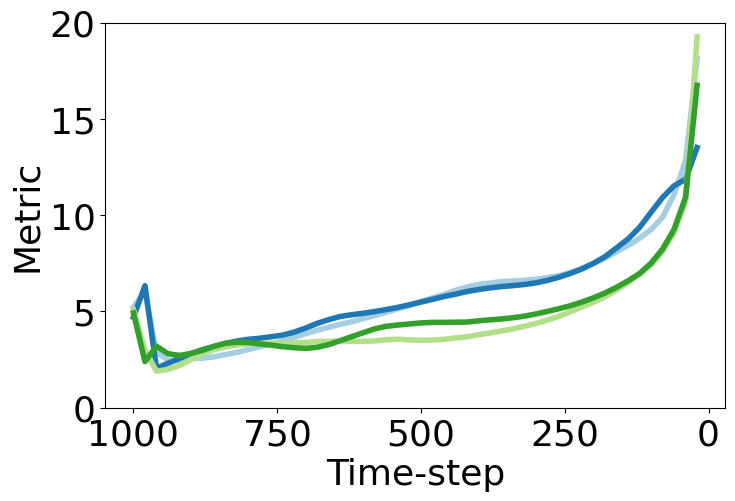

In [6]:
%matplotlib inline
print(f"prompt: {prompt}")
media.show_images(outputs, width=300)

fontsize=26

x = list(range(0, 1000, 20))
x.remove(0)
x.append(1000)
x.reverse()

viridis = plt.colormaps['Paired']
cmap = viridis.colors

fig, ax1 = plt.subplots(figsize=(8, 5))

lns1 = ax1.plot(x, text_noise_norm[0], color=cmap[0], label='0', linewidth=4.0)
lns2 = ax1.plot(x, text_noise_norm[1], color=cmap[1], label='1', linewidth=4.0)
lns3 = ax1.plot(x, text_noise_norm[2], color=cmap[2], label='2', linewidth=4.0)
lns4 = ax1.plot(x, text_noise_norm[3], color=cmap[3], label='3', linewidth=4.0)

lns = lns1 + lns2 + lns3 + lns4
labs = [l.get_label() for l in lns]

ax1.set_xlabel('Time-step', fontsize=fontsize)
ax1.set_ylabel('Metric', fontsize=fontsize)
ax1.invert_xaxis()
ax1.set_ylim([0, 20])

ax1.tick_params(axis='x', labelsize=fontsize)
ax1.tick_params(axis='y', labelsize=fontsize)

## Non-memorized Prompt

In [7]:
prompt = "a photo of a cute dog"
prompt

'a photo of a cute dog'

In [8]:
outputs, track_stats = pipe(
    prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    num_images_per_prompt=num_images_per_prompt,
    track_noise_norm=True,
)
text_noise_norm = track_stats["text_noise_norm"]
outputs = outputs.images

  0%|          | 0/50 [00:00<?, ?it/s]

prompt: a photo of a cute dog


,,,

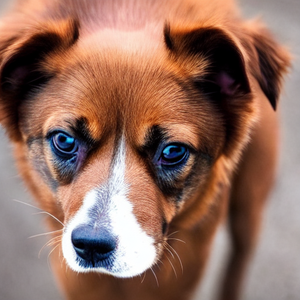
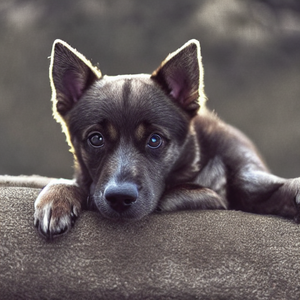
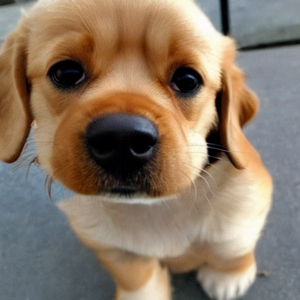
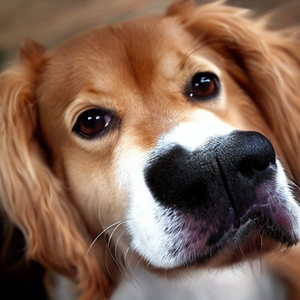

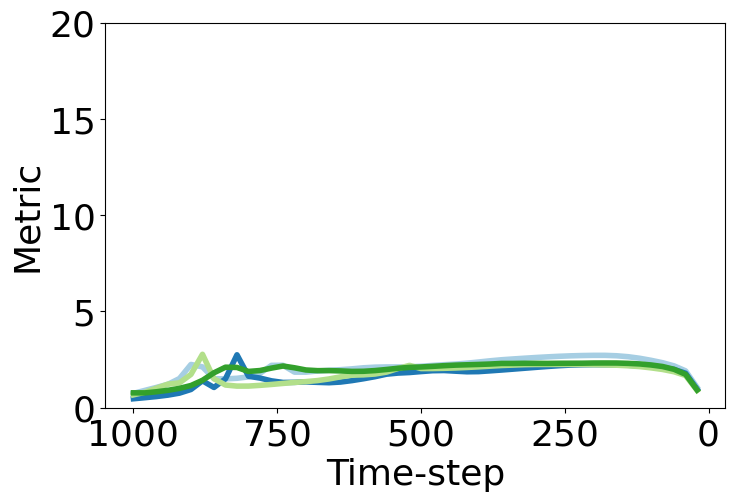

In [9]:
%matplotlib inline
print(f"prompt: {prompt}")
media.show_images(outputs, width=300)

fontsize=26

x = list(range(0, 1000, 20))
x.remove(0)
x.append(1000)
x.reverse()

viridis = plt.colormaps['Paired']
cmap = viridis.colors

fig, ax1 = plt.subplots(figsize=(8, 5))

lns1 = ax1.plot(x, text_noise_norm[0], color=cmap[0], label='0', linewidth=4.0)
lns2 = ax1.plot(x, text_noise_norm[1], color=cmap[1], label='1', linewidth=4.0)
lns3 = ax1.plot(x, text_noise_norm[2], color=cmap[2], label='2', linewidth=4.0)
lns4 = ax1.plot(x, text_noise_norm[3], color=cmap[3], label='3', linewidth=4.0)

lns = lns1 + lns2 + lns3 + lns4
labs = [l.get_label() for l in lns]

ax1.set_xlabel('Time-step', fontsize=fontsize)
ax1.set_ylabel('Metric', fontsize=fontsize)
ax1.invert_xaxis()
ax1.set_ylim([0, 20])

ax1.tick_params(axis='x', labelsize=fontsize)
ax1.tick_params(axis='y', labelsize=fontsize)